# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Comparison between 90%+10% hybrid strategies and 100% DATE
    - DATE(90%)+random(10%)
    - DATE(90%)+BADGE(10%)
    - DATE(90%)+bATE(10%)
    - DATE(90%)+enhanced_bATE(10%)
    - DATE(100%)
    

## 1. Comparison between Hybrid Strategies (by changing Exploration part) and DATE only

In [1]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [219]:
results = glob.glob('../results/performances/fld4-*')   # fld4- or quick- or www21- or fld-result- or fld4-result- or fldsh or flds
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [220]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean13 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean13)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean13, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

100


### Synthetic data Simulation Results - Hybrid

In [221]:
full_results.keys()

dict_keys(['real-t,hybrid,DATE/enhanced_bATE', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-n,hybrid,DATE/enhanced_bATE', 'real-n,hybrid,DATE/random', 'real-t,DATE,-', 'real-n,hybrid,DATE/badge', 'real-n,hybrid,DATE/bATE', 'real-n,DATE,-', 'real-m,hybrid,DATE/enhanced_bATE', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,DATE,-', 'synthetic,hybrid,DATE/enhanced_bATE', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,DATE,-'])

The number of trials for each setting (Results are averaged):
synthetic,hybrid,DATE/enhanced_bATE 5 0.2776
synthetic,hybrid,DATE/random 5 0.2674
synthetic,hybrid,DATE/badge 5 0.2778
synthetic,hybrid,DATE/bATE 5 0.2866
synthetic,DATE,- 5 0.3078


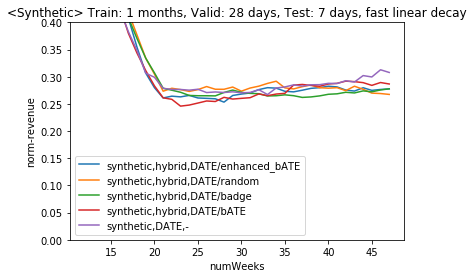

In [222]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(full_results[key])
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Synthetic> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower left')
plt.ylabel(var)
plt.ylim(0,0.4)
plt.xlabel('numWeeks')
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


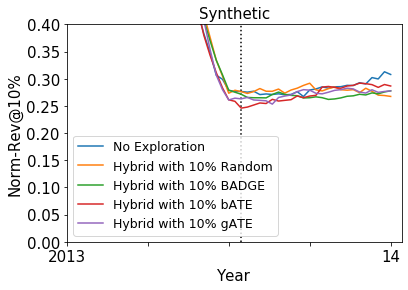

In [223]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,DATE,-', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% gATE')    
    if key == 'synthetic,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Random')
    if key == 'synthetic,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% BADGE')
    if key == 'synthetic,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% bATE') 
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("hybrid-s-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


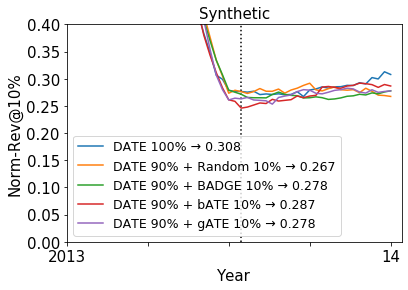

In [224]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,DATE,-', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + gATE 10% → 0.278')    
    if key == 'synthetic,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + Random 10% → 0.267')
    if key == 'synthetic,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + BADGE 10% → 0.278')
    if key == 'synthetic,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + bATE 10% → 0.287') 
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE 100% → 0.308')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("hybrid-s.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


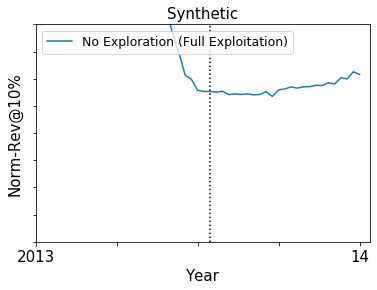

In [225]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     if key == 'synthetic,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-s-only-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


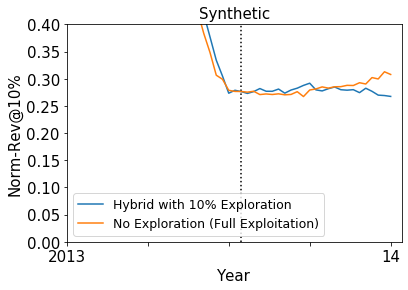

In [226]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-s.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


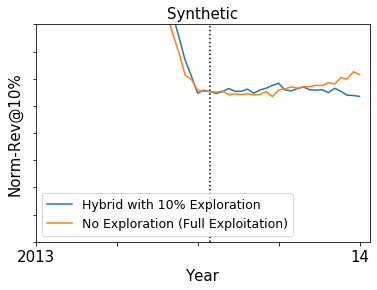

In [227]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0, 0.4)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-s-notick.pdf", bbox_inches='tight')

### Mdata Simulation Results - Hybrid

In [228]:
full_results.keys()

dict_keys(['real-t,hybrid,DATE/enhanced_bATE', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-n,hybrid,DATE/enhanced_bATE', 'real-n,hybrid,DATE/random', 'real-t,DATE,-', 'real-n,hybrid,DATE/badge', 'real-n,hybrid,DATE/bATE', 'real-n,DATE,-', 'real-m,hybrid,DATE/enhanced_bATE', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,DATE,-', 'synthetic,hybrid,DATE/enhanced_bATE', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,DATE,-'])

The number of trials for each setting (Results are averaged):
real-m,hybrid,DATE/enhanced_bATE 5 0.6084
real-m,hybrid,DATE/random 5 0.6146
real-m,hybrid,DATE/badge 5 0.6182
real-m,hybrid,DATE/bATE 5 0.6133
real-m,DATE,- 5 0.5962


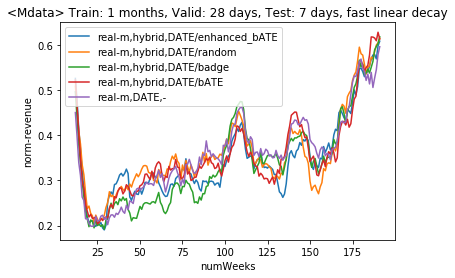

In [229]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-5:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


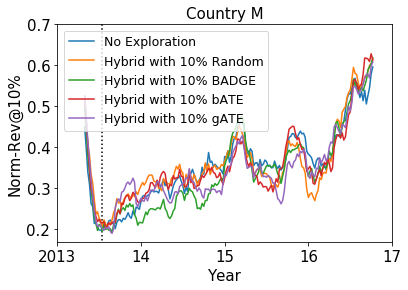

In [230]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-m,DATE,-', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% gATE')    
    if key == 'real-m,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Random')
    if key == 'real-m,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% BADGE')
    if key == 'real-m,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% bATE') 
    if key == 'real-m,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,0.7)

plt.show()
plt.close()
f.savefig("hybrid-m-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


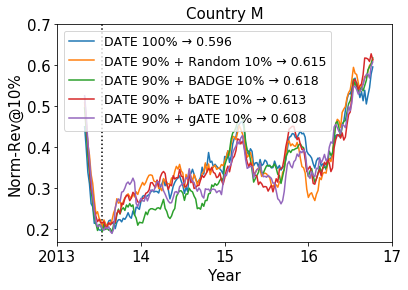

In [231]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-m,DATE,-', 'real-m,hybrid,DATE/random', 'real-m,hybrid,DATE/badge', 'real-m,hybrid,DATE/bATE', 'real-m,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + gATE 10% → 0.608')    
    if key == 'real-m,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + Random 10% → 0.615')
    if key == 'real-m,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + BADGE 10% → 0.618')
    if key == 'real-m,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + bATE 10% → 0.613') 
    if key == 'real-m,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE 100% → 0.596')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,0.7)

plt.show()
plt.close()
f.savefig("hybrid-m.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


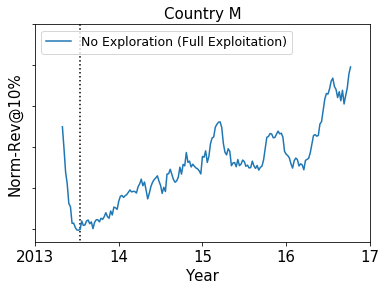

In [232]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     if key == 'real-m,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-m,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,0.7)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-m-only-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


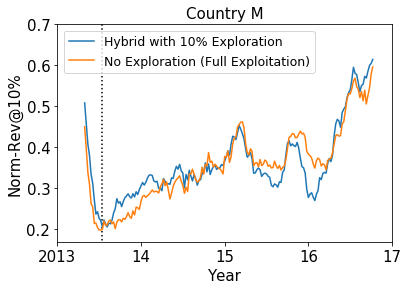

In [233]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-m,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,0.7)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-m.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


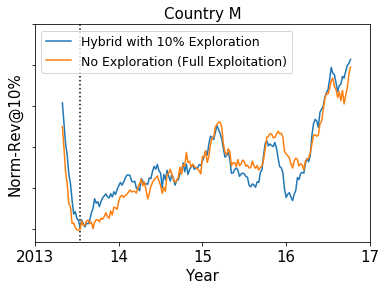

In [234]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-m,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.17,0.7)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-m-notick.pdf", bbox_inches='tight')

### Tdata Simulation Results - Hybrid

The number of trials for each setting (Results are averaged):
real-t,hybrid,DATE/enhanced_bATE 5 0.5751
real-t,hybrid,DATE/random 5 0.5673
real-t,hybrid,DATE/badge 5 0.5769
real-t,hybrid,DATE/bATE 5 0.5762
real-t,DATE,- 5 0.1561


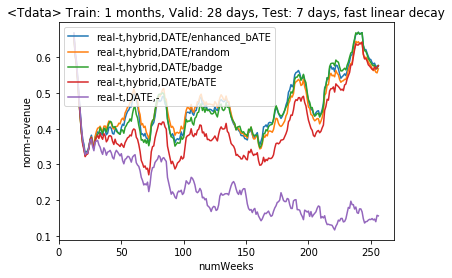

In [235]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


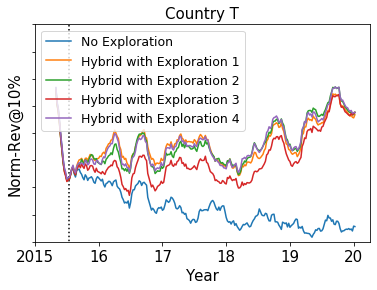

In [236]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-t,DATE,-', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-t,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-t,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with Exploration 4')    
    if key == 'real-t,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with Exploration 1')
    if key == 'real-t,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='Hybrid with Exploration 2')
    if key == 'real-t,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='Hybrid with Exploration 3') 
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)

plt.ylim(0.1,0.9)
plt.show()
plt.close()
f.savefig("hybrid-t-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


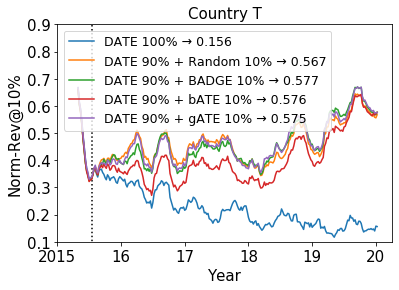

In [237]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-t,DATE,-', 'real-t,hybrid,DATE/random', 'real-t,hybrid,DATE/badge', 'real-t,hybrid,DATE/bATE', 'real-t,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-t,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + gATE 10% → 0.575')    
    if key == 'real-t,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + Random 10% → 0.567')
    if key == 'real-t,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + BADGE 10% → 0.577')
    if key == 'real-t,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + bATE 10% → 0.576')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE 100% → 0.156')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)

plt.ylim(0.1,0.9)
plt.show()
plt.close()
f.savefig("hybrid-t.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


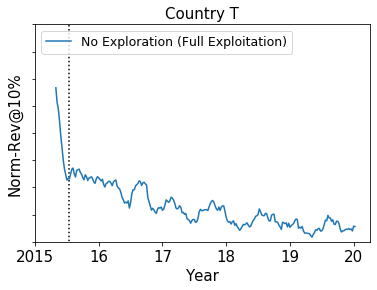

In [238]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
     
#     if key == 'real-t,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.1, 0.9)

plt.show()
plt.close()
f.savefig("exploitation-fail-t-only-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


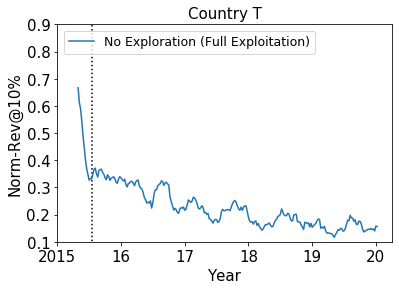

In [239]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
     
#     if key == 'real-t,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.1, 0.9)

plt.show()
plt.close()
f.savefig("exploitation-fail-t-only.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


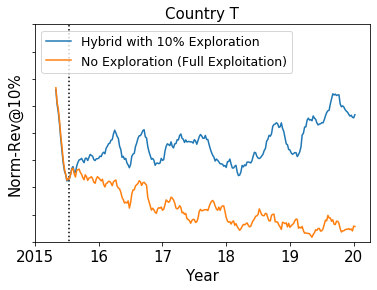

In [240]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
     
    if key == 'real-t,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.1, 0.9)

plt.show()
plt.close()
f.savefig("exploitation-fail-t-notick.pdf", bbox_inches='tight')


The number of trials for each setting (Results are averaged):


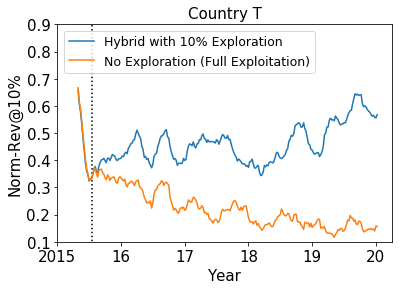

In [241]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
     
    if key == 'real-t,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-t,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19, 20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.1, 0.9)

plt.show()
plt.close()
f.savefig("exploitation-fail-t.pdf", bbox_inches='tight')


### Ndata Simulation Results - Hybrid

The number of trials for each setting (Results are averaged):
real-n,hybrid,DATE/enhanced_bATE 5 0.8371
real-n,hybrid,DATE/random 5 0.8397
real-n,hybrid,DATE/badge 5 0.845
real-n,hybrid,DATE/bATE 5 0.8456
real-n,DATE,- 5 0.8315


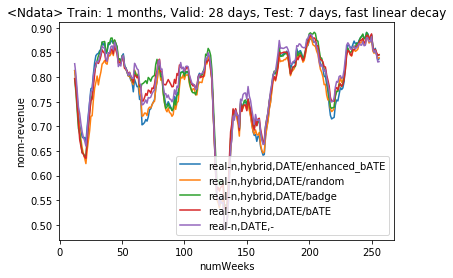

In [242]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)
    
plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.75, 0.85)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


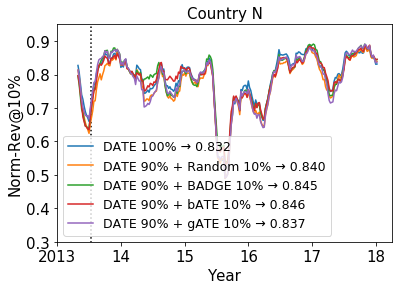

In [243]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-n,DATE,-', 'real-n,hybrid,DATE/random', 'real-n,hybrid,DATE/badge', 'real-n,hybrid,DATE/bATE', 'real-n,hybrid,DATE/enhanced_bATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-n,hybrid,DATE/enhanced_bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + gATE 10% → 0.837')    
    if key == 'real-n,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + Random 10% → 0.840')
    if key == 'real-n,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + BADGE 10% → 0.845')
    if key == 'real-n,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + bATE 10% → 0.846')
    if key == 'real-n,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE 100% → 0.832')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.3,0.95)

plt.show()
plt.close()
f.savefig("hybrid-n.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


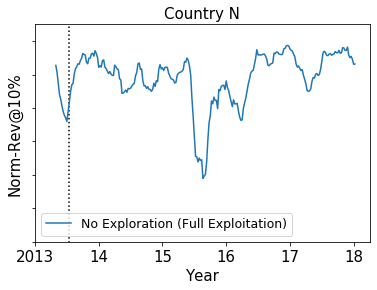

In [244]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     if key == 'real-n,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-n,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.3,0.95)

plt.show()
plt.close()
f.savefig("exploitation-not-fail-n-only-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


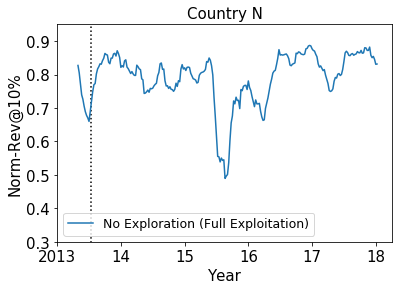

In [245]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     if key == 'real-n,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-n,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.3,0.95)

plt.show()
plt.close()
f.savefig("exploitation-not-fail-n-only.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


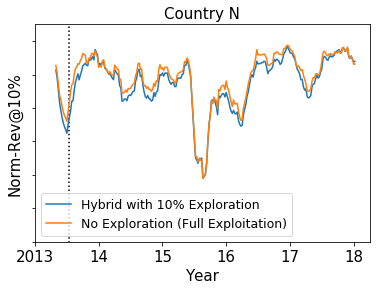

In [246]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-n,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-n,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.3,0.95)

plt.show()
plt.close()
f.savefig("exploitation-not-fail-n-notick.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


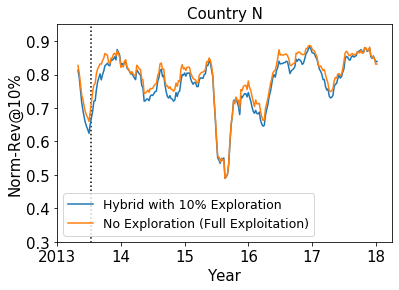

In [247]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-n,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'real-n,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.3,0.95)

plt.show()
plt.close()
f.savefig("exploitation-not-fail-n.pdf", bbox_inches='tight')

## Pure Exploration Strategies

In [261]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

results = glob.glob('../results/performances/fld7-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [262]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean13 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean13)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

57


In [263]:
full_results.keys()

dict_keys(['real-t,enhanced_bATE,-', 'real-t,badge,-', 'real-t,random,-', 'real-t,bATE,-', 'real-t,DATE,-', 'real-t,xgb,-', 'real-n,enhanced_bATE,-', 'real-n,random,-', 'real-n,badge,-', 'real-n,bATE,-', 'real-m,random,-', 'real-m,enhanced_bATE,-', 'real-m,bATE,-', 'real-m,badge,-', 'synthetic,random,-', 'synthetic,badge,-', 'synthetic,bATE,-', 'synthetic,gATE,-'])

### Synthetic data Simulation Results - Single

The number of trials for each setting (Results are averaged):
synthetic,random,- 7 0.0952
synthetic,badge,- 6 0.1656
synthetic,bATE,- 5 0.1694
synthetic,gATE,- 6 0.1028


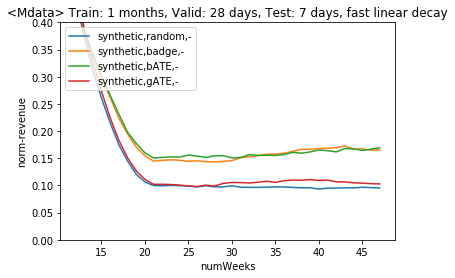

In [264]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.ylim(0, 0.4)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


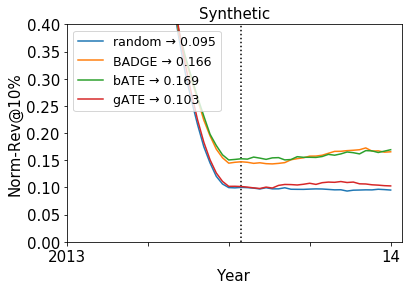

In [266]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,random,-','synthetic,badge,-','synthetic,bATE,-','synthetic,gATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,gATE,-':
        plt.plot(avg_result.index, avg_result, label='gATE → 0.103') 
    if key == 'synthetic,bATE,-':
        plt.plot(avg_result.index, avg_result, label='bATE → 0.169')
    if key == 'synthetic,badge,-':
        plt.plot(avg_result.index, avg_result, label='BADGE → 0.166')
    if key == 'synthetic,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.095')    
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("pure-exploration-s.pdf", bbox_inches='tight')

### Mdata Simulation Results - Single

The number of trials for each setting (Results are averaged):
real-m,random,- 5 0.0785
real-m,enhanced_bATE,- 2 0.2815
real-m,bATE,- 3 0.382
real-m,badge,- 3 0.2955


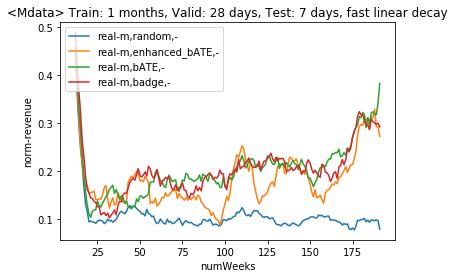

In [253]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    if key == 'real-m,random,-':
        print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))  # for some reason, random strategy didn't performed for last few weeks. 
    else:
        print(key, len(full_results[key]), round(np.mean(avg_result[-6:]), 4))
        
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


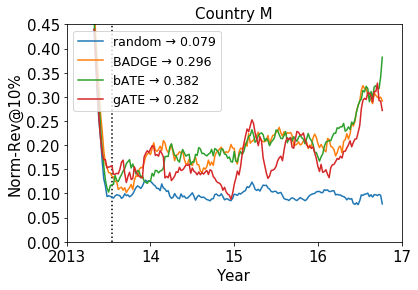

In [254]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-m,random,-','real-m,badge,-','real-m,bATE,-','real-m,enhanced_bATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-m,enhanced_bATE,-':
        plt.plot(avg_result.index, avg_result, label='gATE → 0.282') 
    if key == 'real-m,bATE,-':
        plt.plot(avg_result.index, avg_result, label='bATE → 0.382')
    if key == 'real-m,badge,-':
        plt.plot(avg_result.index, avg_result, label='BADGE → 0.296')
    if key == 'real-m,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.079')    
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203], labels=['2013', 14, 15, 16,17], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country M', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.45)

plt.show()
plt.close()
f.savefig("pure-exploration-m.pdf", bbox_inches='tight')

### Ndata Simulation Results - Single

In [255]:
full_results.keys()

dict_keys(['real-t,enhanced_bATE,-', 'real-t,badge,-', 'real-t,random,-', 'real-t,bATE,-', 'real-t,DATE,-', 'real-t,xgb,-', 'real-n,enhanced_bATE,-', 'real-n,random,-', 'real-n,badge,-', 'real-n,bATE,-', 'real-m,random,-', 'real-m,enhanced_bATE,-', 'real-m,bATE,-', 'real-m,badge,-', 'synthetic,random,-', 'synthetic,badge,-', 'synthetic,bATE,-', 'synthetic,gATE,-'])

The number of trials for each setting (Results are averaged):
real-n,enhanced_bATE,- 2 0.5208
real-n,random,- 2 0.0996
real-n,badge,- 2 0.462
real-n,bATE,- 2 0.418


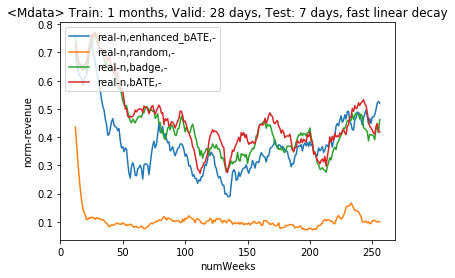

In [256]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


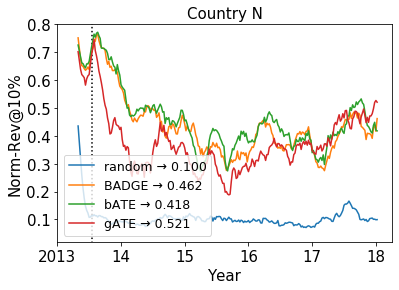

In [257]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-n,random,-','real-n,badge,-','real-n,bATE,-','real-n,enhanced_bATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-n,enhanced_bATE,-':
        plt.plot(avg_result.index, avg_result, label='gATE → 0.521')
    if key == 'real-n,bATE,-':
        plt.plot(avg_result.index, avg_result, label='bATE → 0.418')
    if key == 'real-n,badge,-':
        plt.plot(avg_result.index, avg_result, label='BADGE → 0.462')
    if key == 'real-n,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.100')    
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17,18], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country N', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.02,0.8)

plt.show()
plt.close()
f.savefig("pure-exploration-n.pdf", bbox_inches='tight')

### Tdata Simulation Results - Single

In [258]:
full_results.keys()

dict_keys(['real-t,enhanced_bATE,-', 'real-t,badge,-', 'real-t,random,-', 'real-t,bATE,-', 'real-t,DATE,-', 'real-t,xgb,-', 'real-n,enhanced_bATE,-', 'real-n,random,-', 'real-n,badge,-', 'real-n,bATE,-', 'real-m,random,-', 'real-m,enhanced_bATE,-', 'real-m,bATE,-', 'real-m,badge,-', 'synthetic,random,-', 'synthetic,badge,-', 'synthetic,bATE,-', 'synthetic,gATE,-'])

The number of trials for each setting (Results are averaged):
real-t,enhanced_bATE,- 2 0.2575
real-t,badge,- 2 0.4234
real-t,random,- 2 0.111
real-t,bATE,- 2 0.495
real-t,DATE,- 2 0.1408
real-t,xgb,- 2 0.1253


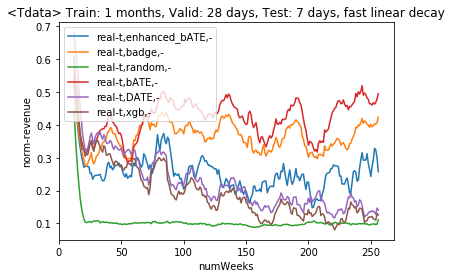

In [259]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


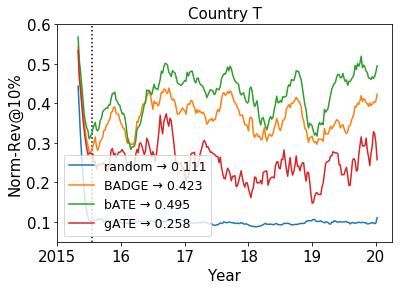

In [260]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['real-t,random,-','real-t,badge,-','real-t,bATE,-','real-t,enhanced_bATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'real-t,enhanced_bATE,-':
        plt.plot(avg_result.index, avg_result, label='gATE → 0.258') 
    if key == 'real-t,bATE,-':
        plt.plot(avg_result.index, avg_result, label='bATE → 0.495')
    if key == 'real-t,badge,-':
        plt.plot(avg_result.index, avg_result, label='BADGE → 0.423')
    if key == 'real-t,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.111')    
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2015', 16, 17, 18,19,20], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country T', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0.05,0.6)

plt.show()
plt.close()
f.savefig("pure-exploration-t.pdf", bbox_inches='tight')

# Novel Fraud Analysis
We show that hybrid model with exploration performs better for trades from new HS6 and new ID

In [ ]:
results = glob.glob('../results/performances/fld5-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [ ]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [ ]:
# Index will be used later
summary[summary.data == 'real-t']

In [ ]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfn = firstCheck(pd.read_csv('data/ndata.csv'))
dft = firstCheck(pd.read_csv('data/tdata.csv'))
dfm = firstCheck(pd.read_csv('data/mdata.csv'))
dfs = firstCheck(pd.read_csv('data/synthetic-imports-declarations.csv'))

In [ ]:
### Previous code
def performanceOnNovel(exp_a):
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    measure_start = 0
    measure_end = week
    novelty = {}
    old_IID = set()

   
    for week in range(measure_start,measure_end):
        filename = glob.glob(f'../results/query_indices/{run_id}-{strategy}-{subsamplings}-*-scratch-week-{week}.csv')[0]
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]

            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')

            if week == measure_start:
                if dataset == 'real-m':
                    df = dfm
                elif dataset == 'synthetic':
                    df = dfs
                elif dataset == 'real-n':
                    df = dfn
                elif dataset == 'real-t':
                    df = dft
                
            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue', 'importer.id']]
            alldata = alldata[~alldata['importer.id'].isin(old_IID)]

            if alldata.empty:
                continue
            
            all_indices = []
            all_samps = ''
            
            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))
                    all_indices.extend(indices)
                    all_samps = all_samps + (samp + '-')
                except StopIteration:
                    break
            
            
            if week == measure_start:
                novelty[f'{all_samps}-pre'] = []
                novelty[f'{all_samps}-rec'] = []
                novelty[f'{all_samps}-rev'] = []

            chosen = df.iloc[all_indices].loc[:, ['illicit', 'revenue', 'importer.id']]
            chosen = chosen[~chosen['importer.id'].isin(old_IID)]

            # Recall and revenue
            try:
                pre = sum(chosen['illicit'])/chosen['illicit'].count()
                rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                rev = sum(chosen['revenue'])/sum(alldata['revenue'])
            except:
                continue
                
            novelty[f'{all_samps}-pre'].append(pre)
            novelty[f'{all_samps}-rec'].append(rec)
            novelty[f'{all_samps}-rev'].append(rev)

            old_IID = old_IID.union(set(alldata['importer.id'].values))
            print(f'# indices = {len(all_indices)}, # old_ID: {len(old_IID)}, # new trades: {len(chosen)}')
    return pd.DataFrame(novelty)

#### Nigeria

In [ ]:
exp6, exp7, exp8, exp9, exp10 = 18, 23, 32, 38, 44
rival6 = performanceOnNovel(summary.loc[exp6])
print('!!!!!!!')
rival7 = performanceOnNovel(summary.loc[exp7])
print('!!!!!!!')
rival8 = performanceOnNovel(summary.loc[exp8])
print('!!!!!!!')
rival9 = performanceOnNovel(summary.loc[exp9])
print('!!!!!!!')
rival10 = performanceOnNovel(summary.loc[exp10])

In [ ]:
# Compare DATE performances: Between two experiments
plt.figure()
r6 = rival6['DATE-enhanced_bATE--rev'].rolling(window=14).mean()
r7 = rival7['DATE-random--rev'].rolling(window=14).mean()
r8 = rival8['DATE-badge--rev'].rolling(window=14).mean()
r9 = rival9['DATE-bATE--rev'].rolling(window=14).mean()
r10 = rival0['DATE--rev'].rolling(window=14).mean()

plt.plot(r6.index, r6, label=summary.loc[exp6]['data']+'-'+summary.loc[exp6]['subsamplings'])
plt.plot(r7.index, r7, label=summary.loc[exp7]['data']+'-'+summary.loc[exp7]['subsamplings'])
plt.plot(r8.index, r8, label=summary.loc[exp8]['data']+'-'+summary.loc[exp8]['subsamplings'])
plt.plot(r9.index, r9, label=summary.loc[exp9]['data']+'-'+summary.loc[exp9]['subsamplings'])
plt.plot(r10.index, r10, label=summary.loc[exp10]['data']+'-'+summary.loc[exp10]['subsamplings'])
plt.title('Compare performance for novel trade patterns')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

#### Tunisia

In [ ]:
exp1, exp2, exp3, exp4, exp5 = 0, 5, 9, 15, 27
rival1 = performanceOnNovel(summary.loc[exp1])
print('!!!!!!!')
rival2 = performanceOnNovel(summary.loc[exp2])
print('!!!!!!!')
rival3 = performanceOnNovel(summary.loc[exp3])
print('!!!!!!!')
rival4 = performanceOnNovel(summary.loc[exp4])
print('!!!!!!!')
rival5 = performanceOnNovel(summary.loc[exp5])

In [ ]:
# Compare DATE performances: Between two experiments
plt.figure()
r1 = rival1['DATE-enhanced_bATE--rev'].rolling(window=14).mean()
r2 = rival2['DATE-random--rev'].rolling(window=14).mean()
r3 = rival3['DATE-badge--rev'].rolling(window=14).mean()
r4 = rival4['DATE-bATE--rev'].rolling(window=14).mean()
r5 = rival5['DATE--rev'].rolling(window=14).mean()

plt.plot(r1.index, r1, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r2.index, r2, label=summary.loc[exp2]['data']+'-'+summary.loc[exp2]['subsamplings'])
plt.plot(r3.index, r3, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.plot(r4.index, r4, label=summary.loc[exp4]['data']+'-'+summary.loc[exp4]['subsamplings'])
plt.plot(r5.index, r5, label=summary.loc[exp5]['data']+'-'+summary.loc[exp5]['subsamplings'])
plt.title('Compare performance for novel trade patterns')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Break the overall performance into exploration / exploitation by looking indices
    - Find which experiment identifier to inspect (One ID for one setting)
    - Compare

In [ ]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfn = firstCheck(pd.read_csv('data/ndata.csv'))
dft = firstCheck(pd.read_csv('data/tdata.csv'))
dfm = firstCheck(pd.read_csv('data/mdata.csv'))
dfs = firstCheck(pd.read_csv('data/synthetic-imports-declarations.csv'))

In [ ]:
len(dfs['illicit']), len(dfm['illicit']), len(dfn['illicit']), len(dft['illicit'])

In [ ]:
np.mean(dfs['illicit']), np.mean(dfm['illicit']), np.mean(dfn['illicit']), np.mean(dft['illicit'])

In [ ]:
results = glob.glob('../results/performances/fld4-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [ ]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [ ]:
summary.sort_values(['data', 'sampling', 'subsamplings','numWeek'])

In [ ]:
# Index will be used later
summary[summary.data == 'real-s']

In [ ]:
# Retrieving results
def getSubsamplerResults(exp_a):
    
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    measure_start = 0
    measure_end = week
    results = {}
    
    for week in range(measure_start,measure_end):
        filename = glob.glob(f'../results/query_indices/{run_id}-{strategy}-{subsamplings}-*-scratch-week-{week}.csv')[0]
        with open(filename, "r") as f:
            reader = csv.reader(f, delimiter=",")
            expid = next(reader)[1]
            dataset = next(reader)[1]
            episode = next(reader)[1]
            start_day = next(reader)[1]
            end_day = next(reader)[1]

            start_day = datetime.date(int(start_day[:4]), int(start_day[5:7]), int(start_day[8:10])).strftime('%y-%m-%d')
            end_day = datetime.date(int(end_day[:4]), int(end_day[5:7]), int(end_day[8:10])).strftime('%y-%m-%d')

            if week == measure_start:
                if dataset == 'real-n':
                    df = dfn
                elif dataset == 'real-t':
                    df = dft
                elif dataset == 'real-m':
                    df = dfm
                elif dataset == 'synthetic':
                    df = dfs

            alldata = df[(df['sgd.date'] < end_day) & (df['sgd.date'] >= start_day)].loc[:, ['illicit', 'revenue']]

            while True:
                try:
                    indices = next(reader)
                    samp = indices[0]
                    indices = indices[1:]
                    indices = list(map(int, indices))

                    if week == measure_start:
                        results[f'{samp}-pre'] = []
                        results[f'{samp}-rec'] = []
                        results[f'{samp}-rev'] = []

                    chosen = df.iloc[indices].loc[:, ['illicit', 'revenue']]
                    # Recall and revenue
                    if chosen.empty:
                        pre = rec = rev = 0
                    else:
                        try:
                            pre = sum(chosen['illicit'])/chosen['illicit'].count()
                        except:
                            pre = 0
                        try:
                            rec = sum(chosen['illicit'])/sum(alldata['illicit'])
                        except:
                            rec = 0
                        try:
                            rev = sum(chosen['revenue'])/sum(alldata['revenue'])
                        except:
                            rev = 0

                    results[f'{samp}-pre'].append(pre)
                    results[f'{samp}-rec'].append(rec)
                    results[f'{samp}-rev'].append(rev)

                except StopIteration:
                    break
    
    return pd.DataFrame(results)

In [ ]:
exp1, exp2 = 63, 68
rival1 = getSubsamplerResults(summary.loc[exp1])
rival2 = getSubsamplerResults(summary.loc[exp2])

In [ ]:
exp3 = 9
rival3 = getSubsamplerResults(summary.loc[exp3])

In [ ]:
rival1.tail(5)

In [ ]:
rival2.tail(5)

In [ ]:
# Compare DATE performances: Between two experiments
plt.figure()
r1 = rival1['DATE-rev'].rolling(window=14).mean()
r2 = rival2['DATE-rev'].rolling(window=14).mean()
r3 = rival3['DATE-rev'].rolling(window=14).mean()
r4 = rival1['random-rev'].rolling(window=14).mean()
r5 = rival3['badge-rev'].rolling(window=14).mean()
plt.plot(r1.index, r1, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r2.index, r2, label=summary.loc[exp2]['data']+'-'+summary.loc[exp2]['subsamplings'])
plt.plot(r3.index, r3, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.plot(r4.index, r4, label=summary.loc[exp1]['data']+'-'+summary.loc[exp1]['subsamplings'])
plt.plot(r5.index, r5, label=summary.loc[exp3]['data']+'-'+summary.loc[exp3]['subsamplings'])
plt.title('Compare DATE performance between two experiments')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

In [ ]:
np.mean((rival2['DATE-rev']+rival2['bATE-rev'])-(rival1['DATE-rev']+rival1['random-rev']))

In [ ]:
## Double check

def individualResult(exp_a):
    run_id = round(exp_a['runID'], 3)
    strategy = exp_a['sampling']
    subsamplings = exp_a['subsamplings'].replace('/','+')
    cir = exp_a['current_inspection_rate']
    week = exp_a['numWeek']
    
    path = f'./results/performances/www21-result-{run_id}-{strategy}-{subsamplings}-{cir}.csv'
    df = pd.read_csv(path)
    var = 'revenue'
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean13 = df[var].rolling(window=13).mean()
    filename = path[path.index('16'):path.index('16')+10]
    info = ','.join(list(df[['data', 'subsamplings']].iloc[0]))
    ### Draw individual figures
    plt.figure()
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean13, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    plt.close()
    print(df[var])
    
individualResult(summary.loc[exp2])


In [ ]:
## Double check
rival2['DATE-rev']+rival2['bATE-rev']